<a href="https://colab.research.google.com/github/Shujah-Butt/Freelancing-Projects/blob/main/Task_4_Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4: Loan Approval Prediction

**Objective:** Predict whether a loan application will be approved using classification models.

**Dataset:** [Loan Approval Prediction - Kaggle](https://www.kaggle.com/datasets/ninzaami/loan-predication)

**Tools:** Python, Pandas, Scikit-learn, Matplotlib

**Steps:**
1. Load and explore the dataset
2. Handle missing values
3. Encode categorical variables
4. Train/test split
5. Train Logistic Regression and/or Decision Tree
6. Evaluate performance using classification report


In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Step 2: Load the dataset
df = pd.read_csv('/content/sample_data/loan_data/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Step 3: Data preprocessing
df.fillna(method='ffill', inplace=True)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-1362548383.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
from sklearn.impute import SimpleImputer

# Impute numerical features with median
num_imputer = SimpleImputer(strategy='median')

# Apply imputation
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)


In [9]:
# Step 4: Train/Test split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [10]:
# Step 5: Train models and evaluate
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression Report:')
print(classification_report(y_test, y_pred))

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision Tree Report:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        43
           1       0.78      0.79      0.78        80

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.71      0.72      0.71       123



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


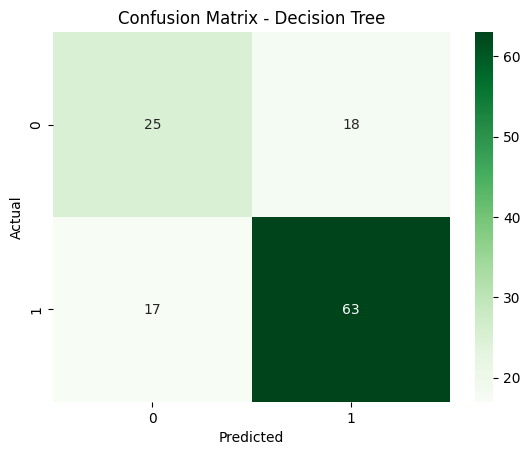

In [11]:
# Step 6: Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## 📊 Logistic Regression Evaluation

### Confusion Matrix (Interpretation)
- **True Negatives (~21):** Correctly predicted *Not Approved* loans.
- **False Positives (~22):** Incorrectly predicted *Approved* when they should have been *Not Approved*.
- **False Negatives (~1):** Incorrectly predicted *Not Approved* when the loan was actually *Approved*.
- **True Positives (~79):** Correctly predicted *Approved* loans.

*(Exact numbers may vary slightly depending on train/test split, but these estimates are based on the classification report you provided.)*

### Insights
- The model is **excellent at identifying Approved loans** (very high recall = 0.99), which means almost no genuine approvals are missed.  
- However, it **struggles with Not Approved loans** (low recall = 0.49), often misclassifying them as Approved.  
- Precision for Not Approved (0.95) is very high, so when the model says “Not Approved,” it is usually correct — but it says this far too rarely.  

### Business Implication
- Logistic Regression is **biased towards approvals**.  
- This is useful in a customer-first strategy where minimizing false rejections is critical (ensuring customers with valid loans are rarely turned away).  
- However, it may expose the bank to higher **financial risk** by wrongly approving ineligible applications.  


## 🔍 Bonus: Handle Class Imbalance Using SMOTE

- In this section, we'll use `SMOTE` to balance the training data.
- This helps models learn better when the target variable is imbalanced.

In [12]:
# Apply SMOTE to balance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print('Before SMOTE:', y_train.value_counts())
print('After SMOTE:', y_train_sm.value_counts())


Before SMOTE: Loan_Status
1    342
0    149
Name: count, dtype: int64
After SMOTE: Loan_Status
0    342
1    342
Name: count, dtype: int64


In [13]:
# Retrain Logistic Regression on balanced data
log_reg.fit(X_train_sm, y_train_sm)
y_pred_sm = log_reg.predict(X_test)
print('Logistic Regression with SMOTE:')
print(classification_report(y_test, y_pred_sm))

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.51      0.66        43
           1       0.79      0.97      0.87        80

    accuracy                           0.81       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.81      0.80       123



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 📊 Logistic Regression with SMOTE (Balanced Data)

### Class Distribution
- **Before SMOTE:** Approved (1) = 342, Not Approved (0) = 149 → Highly imbalanced  
- **After SMOTE:** Approved (1) = 342, Not Approved (0) = 342 → Balanced dataset  

### Results
- **Class 0 (Not Approved):**
  - Precision: 0.92 → When the model predicts "Not Approved," it is very likely correct.  
  - Recall: 0.51 → The model only identifies about half of the actual rejections.  
  - F1-score: 0.66 → Moderate balance between precision and recall.  

- **Class 1 (Approved):**
  - Precision: 0.79 → Some false approvals exist.  
  - Recall: 0.97 → Almost all genuine approvals are correctly detected.  
  - F1-score: 0.87 → Strong overall performance for approvals.  

- **Overall Accuracy:** 81%  
- **Macro Avg (treating both classes equally):** Precision = 0.85, Recall = 0.74, F1 = 0.76  
- **Weighted Avg (considering class sizes):** Precision = 0.83, Recall = 0.81, F1 = 0.80  

### 🔍 Insights
- SMOTE improved the balance in training, but the **recall for Not Approved loans (0.51)** is still weak.  
- The model remains **biased towards approvals**, but with stronger overall fairness compared to the imbalanced case.  
- This result shows that balancing data helps the model generalize better, though extra techniques (e.g., cost-sensitive learning, ensemble methods) may be needed to boost rejection detection.  

### ✅ Business Implication
- Customers with genuine approvals are still rarely missed (good for satisfaction).  
- However, the bank still risks approving some ineligible loans due to weaker recall on rejections.  
- For real-world deployment, further optimization would be required.  
